In [6]:
import os
import numpy as np
import shutil
import random
import torchvision.transforms
import cv2
import matplotlib.pyplot as plt

In [135]:
folder_path = "./SUN-dataset"
SUN397_path = "./datasets/SUN397"
categories_path = "./datasets/classes.txt"
class_subset = 1


def create_SUN_subset(folder_path, SUN397_path, categories_path, class_subset):
    
    if not os.path.exists(folder_path):   #create dataset main directory
        os.makedirs(folder_path)
        
    all_items=os.listdir(SUN397_path)
    
    directories = np.sort([item for item in all_items if os.path.isdir(os.path.join(SUN397_path, item))])

    with open(categories_path) as f:
        categories = f.read().replace("\n", "").split(", ")

    for letter in directories:
    
        indices = np.where(np.array([word[0] == letter for word in categories]))[0]

        filtered_categories = [categories[i] for i in indices]
    
        for category in filtered_categories:
        
            destination_path = f"{folder_path}/{letter}/{category}"
            source_path = f"{SUN397_path}/{letter}/{category}"
        
            if not os.path.exists(destination_path):
                os.makedirs(destination_path)
            
            img_instances = os.listdir(source_path)
            max_instances = int(class_subset*len(img_instances))
            
            for i in range(max_instances): 
                
                img_indx = random.randint(0, len(img_instances)-1)
                img_sample = img_instances[img_indx]

                
                source_file = os.path.join(source_path, img_sample)
            
                new_filename = "{}{}".format(category.split("/")[0], i+1)
            
                destination_file = os.path.join(destination_path, new_filename)
                shutil.copy(source_file, destination_file)

                img_instances.remove(img_sample)
                
                
create_SUN_subset(folder_path=folder_path, SUN397_path=SUN397_path, categories_path=categories_path, class_subset=class_subset)
    
    

In [13]:
image/255

array([[[0.00087659, 0.00081507, 0.00098424],
        [0.00083045, 0.00084583, 0.00099962],
        [0.00073818, 0.00081507, 0.00095348],
        ...,
        [0.00392157, 0.00390619, 0.00392157],
        [0.00264514, 0.00309112, 0.00392157],
        [0.0013687 , 0.00178393, 0.0028143 ]],

       [[0.00098424, 0.00090734, 0.00104575],
        [0.00084583, 0.00087659, 0.00099962],
        [0.00069204, 0.00076894, 0.00090734],
        ...,
        [0.00389081, 0.00381392, 0.00379854],
        [0.00330642, 0.00362937, 0.00392157],
        [0.00250673, 0.00279892, 0.00336794]],

       [[0.00083045, 0.00075356, 0.00089196],
        [0.0007228 , 0.00075356, 0.00087659],
        [0.00063053, 0.00067666, 0.00079969],
        ...,
        [0.00392157, 0.00392157, 0.00386005],
        [0.00378316, 0.00392157, 0.00392157],
        [0.00370627, 0.00384468, 0.00389081]],

       ...,

       [[0.0002153 , 0.00047674, 0.00052288],
        [0.00039985, 0.00066128, 0.00070742],
        [0.00052288, 0

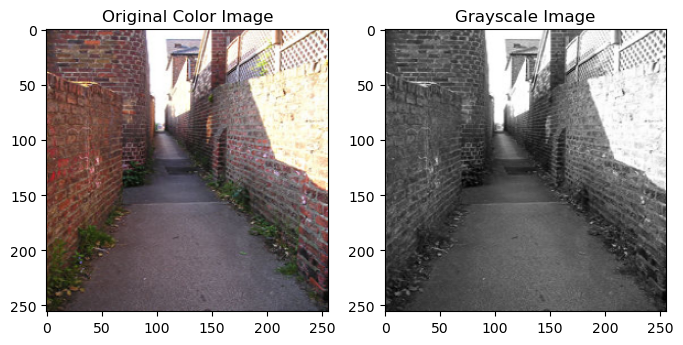

In [16]:
img_path = "./SUN-dataset/a/alley/alley1"

image = cv2.imread(img_path)

target_width = 256
target_height = 256

rescaled_image = cv2.resize(image, (target_width, target_height))

#rescaled_image = rescaled_image.astype(float)

#rescaled_image = rescaled_image/255.


image_rgb = cv2.cvtColor(rescaled_image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(rescaled_image, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Color Image')

# Visualize the rescaled color image
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap="gray")
plt.title('Grayscale Image')

plt.show()

In [ ]:
transforms = torchvision.transforms.Compose([torchvision.transforms.Resize((256,256)), 
    torchvision.transforms.ToTensor(), torchvision.transforms.Normalize(train_mean, train_std)])

In [ ]:
train_data = torchvision.datasets.CIFAR10(root=ROOT, train=True, download=True, transform=train_transforms)

In [ ]:
transform = torchvision.transforms.Resize((300,350))

In [ ]:
resized_img = transform(img)